In [2]:
# to access files and folders
import os

# data analysis and manipulation library
import pandas as pd

# math operations for multidimensional arrays and matrices
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # use a specific color theme

import warnings

warnings.simplefilter("ignore")  # ignore warnings during execution

# ML libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

from sklearn.model_selection import GroupKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [3]:
# read the data
DATA_DIR_PATH = "initial_data/"
print("Reading data")
label_df = pd.read_csv(DATA_DIR_PATH + "segments_labels.csv", index_col=0)
temp_df = pd.read_csv(DATA_DIR_PATH + "segments_temperature.csv", index_col=0)
hr_df = pd.read_csv(DATA_DIR_PATH + "segments_heartrate.csv", index_col=0)
gsr_df = pd.read_csv(DATA_DIR_PATH + "segments_gsr.csv", index_col=0)
rr_df = pd.read_csv(DATA_DIR_PATH + "segments_rr.csv", index_col=0)
print("Done")

# check 30-second segments
print("Data shapes:")
print("Labels", label_df.shape)
print("Temperature", temp_df.shape)
print("Heartrate", hr_df.shape)
print("GSR", gsr_df.shape)
print("RR", rr_df.shape)

Reading data
Done
Data shapes:
Labels (838, 21)
Temperature (838, 30)
Heartrate (838, 30)
GSR (838, 30)
RR (838, 30)


In [4]:
label_df.head()

,datetime,timestamp,user_id,level,task,hr,gsr,rr,temperature,TLX_mean,...,TLX_physical_demand,TLX_temporal_demand,TLX_performance,TLX_effort,TLX_frustration,band_ax,band_ay,band_az,opacity_median,opacity_std
0,2017-10-18 14:22:16,1508336535506,2nxs5,1,n2,103.333333,4.446004,0.564128,30.719999,-1,...,-1,-1,-1,-1,-1,-0.989217,0.174154,0.064006,-1.000000,-1.000000
1,2017-10-18 14:25:13,1508336712502,2nxs5,rest,n2_rest,82.333333,3.595397,0.696864,31.199999,-1,...,-1,-1,-1,-1,-1,-0.935425,0.152669,0.293742,-1.000000,-1.000000
2,2017-10-18 14:27:13,1508336832489,2nxs5,2,n3,94.333333,3.348273,0.586251,31.483334,-1,...,-1,-1,-1,-1,-1,-1.001057,0.094849,-0.018677,-1.000000,-1.000000
3,2017-10-18 14:30:13,1508337012492,2nxs5,rest,n3_rest,88.000000,3.736313,0.630496,31.643333,-1,...,-1,-1,-1,-1,-1,0.106689,0.514404,0.841716,-1.000000,-1.000000
4,2017-10-18 14:41:14,1508337673505,2nxs5,2,HP,84.000000,2.394651,0.718987,32.590000,13,...,1,2,3,3,2,-0.941773,0.214233,0.276286,0.101961,0.014139


In [5]:
hr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,114.666667,113.333333,112.666667,113.333333,114.333333,114.333333,112.000000,109.666667,108.333333,108.000000,...,109.333333,107.666667,106.000000,105.333333,105.666667,106.000000,106.000000,105.666667,105.000000,104.000000
1,90.666667,90.666667,90.666667,90.333333,89.666667,89.000000,88.666667,88.000000,87.333333,86.666667,...,82.666667,82.333333,82.333333,82.666667,83.333333,83.333333,83.333333,83.000000,83.000000,82.666667
2,94.000000,93.666667,93.333333,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,96.666667,96.000000,95.666667,95.333333,95.000000,95.000000,94.666667,94.000000,93.333333,93.666667
3,69.333333,70.000000,75.666667,81.500000,86.500000,86.166667,86.000000,86.000000,86.500000,87.166667,...,89.000000,89.333333,89.000000,88.333333,87.666667,87.666667,87.666667,88.000000,88.000000,88.000000
4,82.666667,82.000000,81.333333,81.000000,81.000000,81.000000,81.666667,81.666667,82.000000,82.000000,...,81.000000,79.666667,80.333333,81.666667,84.333333,85.666667,86.666667,86.000000,85.000000,84.333333


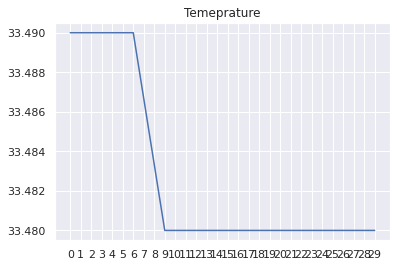

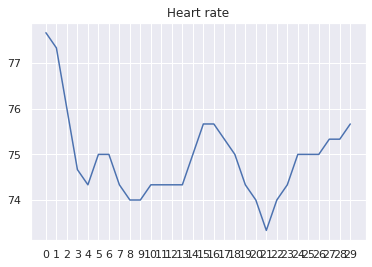

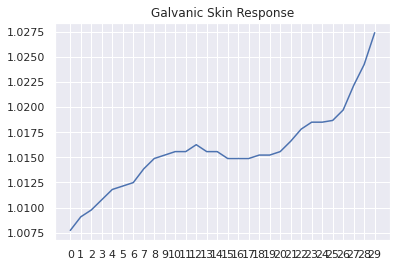

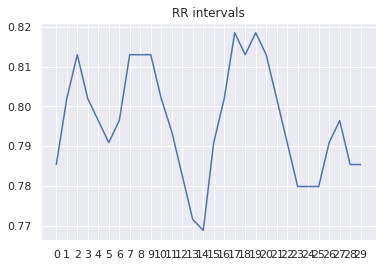

In [6]:
# plot first segmend from each data type
segment_index = 77


plt.plot(temp_df.iloc[segment_index])
plt.title("Temeprature")
plt.show()
print()

plt.plot(hr_df.iloc[segment_index])
plt.title("Heart rate")
plt.show()
print()

plt.plot(gsr_df.iloc[segment_index])
plt.title("Galvanic Skin Response")
plt.show()
print()

plt.plot(rr_df.iloc[segment_index])
plt.title("RR intervals")
plt.show()
print()

In [7]:
# apply moving average to each 30-second segment separately
temp_df_ma = temp_df.rolling(3, axis=1).mean()

hr_df_ma = hr_df.rolling(3, axis=1).mean()
gsr_df_ma = gsr_df.rolling(3, axis=1).mean()
rr_df_ma = rr_df.rolling(3, axis=1).mean()

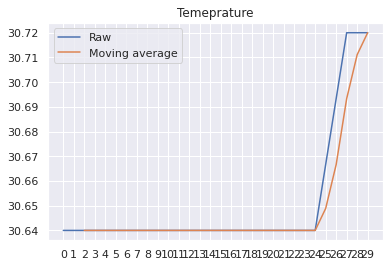

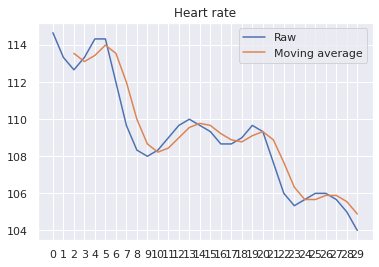

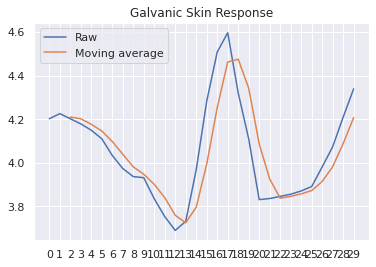

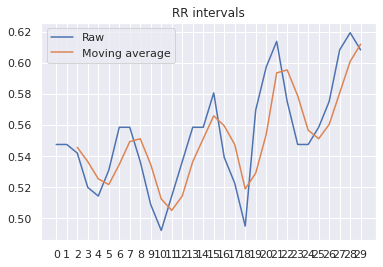

In [8]:
# plot first segmend from each data type (raw and fitlered values)
plt.plot(temp_df.iloc[0], label="Raw")
plt.plot(temp_df_ma.iloc[0], label="Moving average")
plt.title("Temeprature")
plt.legend()
plt.show()
print()

plt.plot(hr_df.iloc[0], label="Raw")
plt.plot(hr_df_ma.iloc[0], label="Moving average")
plt.title("Heart rate")
plt.legend()
plt.show()
print()


plt.plot(gsr_df.iloc[0], label="Raw")
plt.plot(gsr_df_ma.iloc[0], label="Moving average")
plt.title("Galvanic Skin Response")
plt.legend()
plt.show()
print()


plt.plot(rr_df.iloc[0], label="Raw")
plt.plot(rr_df_ma.iloc[0], label="Moving average")
plt.title("RR intervals")
plt.legend()
plt.show()
print()

In [9]:
def extract_stat_features(df, data_type=""):
    stat_features_names = [
        "mean",
        "std",
        "skew",
        "kurtosis",
        "diff",
        "diff2",
        "q25",
        "q75",
        "qdev",
        "max-min",
    ]
    final_names = [data_type + "_" + x for x in stat_features_names]
    features = pd.DataFrame(columns=stat_features_names)  # create empty dataframe
    values = [
        df.mean(axis=1).values,  # mean
        df.std(axis=1).values,  # standard deviation
        df.skew(axis=1).values,  # skewness
        df.kurtosis(axis=1).values,  # kurtosis
        df.diff(axis=1).mean(axis=1).values,  # mean value of first derivative
        df.diff(axis=1)
        .diff(axis=1)
        .mean(axis=1)
        .values,  # mean value of second derivative
        df.quantile(0.25, axis=1).values,  # 25th quantile
        df.quantile(0.75, axis=1).values,  # 75th quantile
        df.quantile(0.75, axis=1).values
        - df.quantile(0.25, axis=1).values,  # quartile deviation
        df.max(axis=1).values - df.min(axis=1).values,
    ]  # range
    values = np.column_stack(values)
    return pd.DataFrame(values, columns=final_names)


# extract features from temeprature data
temp_stat_features = extract_stat_features(temp_df_ma, "temp")
temp_stat_features.shape, temp_df_ma.shape

((838, 10), (838, 30))

In [10]:
# extract features from heart-rate data
hr_stat_features = extract_stat_features(hr_df_ma, "hr")
# extract features from GSR data
gsr_stat_features = extract_stat_features(gsr_df_ma, "gsr")
# extract features from RR data
rr_stat_features = extract_stat_features(rr_df_ma, "rr")
print(
    temp_stat_features.shape,
    hr_stat_features.shape,
    gsr_stat_features.shape,
    rr_stat_features.shape,
)

(838, 10) (838, 10) (838, 10) (838, 10)


In [11]:
hr_stat_features

,hr_mean,hr_std,hr_skew,hr_kurtosis,hr_diff,hr_diff2,hr_q25,hr_q75,hr_qdev,hr_max-min
0,109.099206,2.685690,0.361730,-0.626800,-0.320988,-8.547009e-03,107.333333,109.833333,2.500000,9.111111
1,85.400794,2.857592,0.629340,-1.099971,-0.288066,-4.273504e-03,82.861111,87.500000,4.638889,8.222222
2,94.972222,2.005166,0.669336,-0.956245,0.000000,5.465713e-16,93.083333,96.250000,3.166667,5.777778
3,86.289683,3.901636,-2.906282,8.436075,0.604938,-1.517094e-01,86.472222,88.000000,1.527778,17.444444
4,82.464286,1.717617,0.869379,-0.428657,0.115226,-8.547009e-03,81.194444,83.888889,2.694444,5.777778
...,...,...,...,...,...,...,...,...,...,...
833,64.670635,1.142552,-0.308757,-1.535510,-0.012346,0.000000e+00,63.694444,65.666667,1.972222,3.111111
834,63.724206,5.653711,-1.191523,-0.159442,-0.127572,2.136752e-01,61.541667,67.250000,5.708333,18.055556
835,63.924603,2.424734,-0.019462,-0.321932,-0.160494,2.732857e-16,63.250000,65.166667,1.916667,8.666667
836,70.896825,1.167667,0.053372,-0.577309,0.069959,1.709402e-02,70.388889,71.361111,0.972222,4.000000


In [12]:
# merge all statistical features into one table
stat_feat_all = pd.concat(
    [temp_stat_features, hr_stat_features, gsr_stat_features, rr_stat_features], axis=1
)
stat_feat_all

,temp_mean,temp_std,temp_skew,temp_kurtosis,temp_diff,temp_diff2,temp_q25,temp_q75,temp_qdev,temp_max-min,...,rr_mean,rr_std,rr_skew,rr_kurtosis,rr_diff,rr_diff2,rr_q25,rr_q75,rr_qdev,rr_max-min
0,30.648571,2.197152e-02,2.595327,5.683467,0.002963,0.000342,30.639999,30.639999,0.000000,0.080000,...,0.550861,0.027927,0.506718,-0.316818,0.002458,0.000780,0.533248,0.561824,0.028575,0.106926
1,31.140039,2.574580e-03,0.645934,13.692272,0.000700,0.000043,31.139999,31.139999,0.000000,0.018889,...,0.775149,0.093463,1.248667,0.980728,0.008057,0.001773,0.712995,0.818539,0.105544,0.376085
2,31.410119,2.905931e-03,1.693704,14.830823,0.000782,0.000128,31.410000,31.410000,0.000000,0.021111,...,0.600209,0.040866,-1.316105,3.066315,-0.001639,0.000567,0.586251,0.624965,0.038715,0.200948
3,31.650158,6.566115e-04,4.615168,22.128099,-0.000123,0.000085,31.650000,31.650000,0.000000,0.003333,...,0.575584,0.115042,-1.754535,2.586119,-0.015295,0.006098,0.557676,0.641096,0.083421,0.471950
4,32.589841,6.564863e-04,-4.615168,22.128099,0.000123,-0.000085,32.590000,32.590000,0.000000,0.003333,...,0.721554,0.025349,-0.251059,-0.439276,0.000068,0.000496,0.703777,0.736040,0.032262,0.092178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,33.344999,4.851838e-03,0.000000,-2.073596,-0.000370,0.000000,33.340000,33.349998,0.009998,0.009998,...,0.901433,0.127522,-0.567806,-0.530729,0.001092,0.003971,0.812547,1.007042,0.194495,0.453515
834,33.362500,4.130500e-03,1.212611,-0.420526,-0.000370,0.000000,33.360001,33.364167,0.004166,0.009998,...,0.905317,0.068424,-0.076881,-0.990108,-0.005189,-0.000993,0.842966,0.949431,0.106465,0.245193
835,33.360001,1.447163e-14,0.000000,0.000000,0.000000,0.000000,33.360001,33.360001,0.000000,0.000000,...,0.945119,0.079831,-0.224747,0.421209,-0.003619,0.000496,0.909795,1.005660,0.095865,0.350276
836,33.356427,8.998286e-03,0.804673,-1.348324,0.000741,0.000000,33.349998,33.368332,0.018334,0.020000,...,0.878158,0.087104,-0.204591,-0.598170,-0.003209,-0.003262,0.819921,0.939292,0.119370,0.338292


In [13]:
# install neurokit:
!pip install neurokit2 #execute only once
import neurokit2 as nk

Defaulting to user installation because normal site-packages is not writeable


{'SCR_Onsets': array([1057, 3599, 7088]),
 'SCR_Peaks': array([1350, 3893, 7399]),
 'SCR_Height': array([0.68648372, 0.65801105, 0.67104442]),
 'SCR_Amplitude': array([0.93806991, 0.95896921, 0.94395428]),
 'SCR_RiseTime': array([1.172, 1.176, 1.244]),
 'SCR_Recovery': array([1760., 4366., 7836.]),
 'SCR_RecoveryTime': array([1.64 , 1.892, 1.748]),
 'sampling_rate': 250}

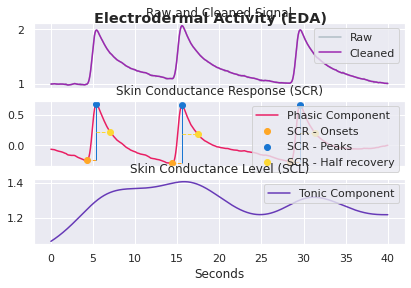

In [14]:
# Neurokit example: https://github.com/neuropsychology/NeuroKit
eda = nk.eda_simulate(duration=10, scr_number=3)
# Process it
signals, info = nk.eda_process(eda, sampling_rate=250)

# Visualise the processing
p = nk.eda_plot(signals, sampling_rate=250)

info

{'SCR_Onsets': array([ 14, 202]),
 'SCR_Peaks': array([ 51, 224]),
 'SCR_Height': array([0.09571262, 0.04978473]),
 'SCR_Amplitude': array([0.18497114, 0.02202933]),
 'SCR_RiseTime': array([3.7, 2.2]),
 'SCR_Recovery': array([ 76., 236.]),
 'SCR_RecoveryTime': array([2.5, 1.2]),
 'sampling_rate': 10}

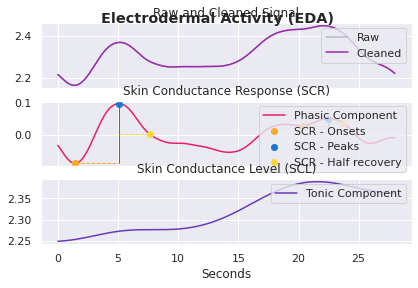

In [15]:
# example with our data
my_eda = gsr_df_ma.iloc[10].dropna()
from scipy.signal import resample

# Neurokit required 10Hz sampling frequency. Here we upsample the signal
my_eda_resampled = resample(my_eda.values, len(my_eda.values) * 10)
# Process it
signals, info = nk.eda_process(my_eda_resampled, sampling_rate=10)

# Visualise the processing
p = nk.eda_plot(signals, sampling_rate=10)

info

In [16]:
def extract_eda_features(df):

    feature_keys = [
        "SCR_Onsets",
        "SCR_Peaks",
        "SCR_Height",
        "SCR_Amplitude",
        "SCR_RiseTime",
        "SCR_Recovery",
        "SCR_RecoveryTime",
    ]

    # for each feature key we will caclulate min, max and mean values
    feature_names = []
    for f in feature_keys:
        feature_names.append("min_" + f)
        feature_names.append("max_" + f)
        feature_names.append("mean_" + f)

    # iterate through all 30-second segments
    features_arr = []
    for i in range(len(df)):
        my_eda = df.iloc[i].dropna()
        # Neurokit required 10Hz sampling frequency. Here we upsample the signal
        my_eda_resampled = resample(my_eda.values, len(my_eda.values) * 10)
        # Process it
        signals, info = nk.eda_process(my_eda_resampled, sampling_rate=10)

        segment_features = []
        for k in feature_keys:
            # initial values are 0
            feature_min = 0
            feature_max = 0
            feature_mean = 0

            # drop Nan values
            values = info[k]
            values = values[~np.isnan(values)]
            if (
                len(values) > 0
            ):  # update feature-values if there is at least 1 detected value (e.g., at least one peak), else leave 0
                feature_min = np.min(values)
                feature_max = np.max(values)
                feature_mean = np.mean(values)
            segment_features.extend([feature_min, feature_max, feature_mean])
        features_arr.append(segment_features)
    return pd.DataFrame(features_arr, columns=feature_names)


gsr_expert_features = extract_eda_features(gsr_df_ma)

In [17]:
gsr_expert_features

,min_SCR_Onsets,max_SCR_Onsets,mean_SCR_Onsets,min_SCR_Peaks,max_SCR_Peaks,mean_SCR_Peaks,min_SCR_Height,max_SCR_Height,mean_SCR_Height,min_SCR_Amplitude,...,mean_SCR_Amplitude,min_SCR_RiseTime,max_SCR_RiseTime,mean_SCR_RiseTime,min_SCR_Recovery,max_SCR_Recovery,mean_SCR_Recovery,min_SCR_RecoveryTime,max_SCR_RecoveryTime,mean_SCR_RecoveryTime
0,111.0,111.0,111.000000,155,155,155.000000,0.412937,0.412937,0.412937,0.666066,...,0.666066,4.4,4.4,4.400000,179.0,179.0,179.0,2.4,2.4,2.400000
1,2.0,175.0,80.666667,28,231,120.666667,0.120019,0.172617,0.147452,0.120124,...,0.255600,2.6,5.6,4.000000,38.0,245.0,141.5,1.0,1.4,1.200000
2,30.0,122.0,76.000000,55,175,115.000000,0.044212,0.182914,0.113563,0.047212,...,0.207134,2.5,5.3,3.900000,72.0,218.0,145.0,1.7,4.3,3.000000
3,4.0,214.0,87.333333,15,268,112.666667,0.016312,0.391414,0.146098,0.025883,...,0.242284,1.1,5.4,2.533333,70.0,70.0,70.0,1.5,1.5,1.500000
4,15.0,205.0,85.000000,4,214,71.750000,-0.002288,0.103874,0.052664,0.012838,...,0.024942,0.9,1.0,0.933333,29.0,218.0,99.0,0.4,0.5,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,113.0,113.0,113.000000,21,176,98.500000,0.017112,0.020173,0.018642,0.033927,...,0.033927,6.3,6.3,6.300000,216.0,216.0,216.0,4.0,4.0,4.000000
834,112.0,112.0,112.000000,4,219,111.500000,0.006744,0.054151,0.030447,0.056376,...,0.056376,10.7,10.7,10.700000,233.0,233.0,233.0,1.4,1.4,1.400000
835,14.0,114.0,54.333333,4,196,67.000000,0.001737,0.022066,0.011068,0.004201,...,0.011874,0.9,8.2,3.366667,30.0,235.0,105.0,0.6,3.9,1.700000
836,92.0,169.0,130.500000,131,220,175.500000,0.014851,0.024324,0.019587,0.024942,...,0.034276,3.9,5.1,4.500000,147.0,241.0,194.0,1.6,2.1,1.850000


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,1060.020964,83.466138,36.602126,76.783897,17.685523,81.692637,NaN,NaN,64.451467,64.519189,...,1.689328,4.989563,1.255956,1.751363,1.328535,2.373092,1.923309,1.892273,3.50486,0.876727


<Figure size 720x720 with 0 Axes>

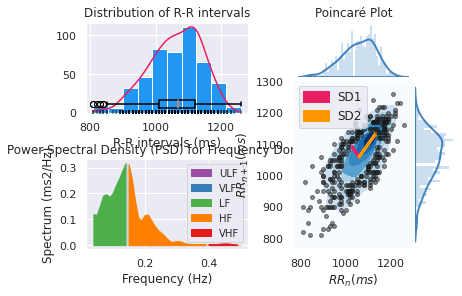

In [18]:
# neurokit example: https://github.com/neuropsychology/NeuroKit
data = nk.data("bio_resting_8min_100hz")

# Find peaks
peaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

# Compute HRV indices
ax = plt.figure(figsize=(10, 10))
nk.hrv(peaks, sampling_rate=100, show=True)

In [19]:
# example with our data
rr = rr_df_ma.iloc[12].dropna()  # 30-second rr intervals

# convert rr intervals to peaks array (input expected by neurokit)
peaks_rr = np.zeros(len(rr) * 1000)
peaks_rr[0] = 1
prev_peak = 0
for r in rr:
    peak_idx = prev_peak + int(r * 1000)
    prev_peak = peak_idx
    peaks_rr[peak_idx] = 1

# check if conversion was OK
print((rr * 1000).astype(int).values)  # convert to miliseconds
print(np.argwhere(peaks_rr == 1)[:, 0][1:] - np.argwhere(peaks_rr == 1)[:, 0][:-1])

[648 654 652 652 648 648 641 624 610 613 645 676 691 689 695 713 733 741
 735 730 730 739 744 750 741 731 718 717]
[648 654 652 652 648 648 641 624 610 613 645 676 691 689 695 713 733 741
 735 730 730 739 744 750 741 731 718 717]


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,689.571429,45.428355,NaN,NaN,NaN,NaN,NaN,NaN,12.458821,12.426192,...,0.523248,4.423252,0.601837,0.0,0.0,0.0,1.642795,1.217078,1.371347,0.686765


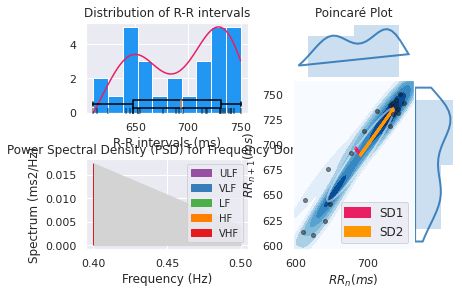

In [20]:
# perform HRV analysis over our data
example_df = nk.hrv(peaks_rr, sampling_rate=1000, show=True)
example_df

In [21]:
example_df.columns

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2',
       'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD', 'HRV_SDSD',
       'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN',
       'HRV_IQRNN', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20',
       'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'HRV_ULF', 'HRV_VLF',
       'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn',
       'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2', 'HRV_S', 'HRV_CSI',
       'HRV_CVI', 'HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS', 'HRV_PSS',
       'HRV_PAS', 'HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C1a',
       'HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a',
       'HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_DFA_alpha1',
       'HRV_MFDFA_alpha1_Width', 'HRV_MFDFA_alpha1_Peak',
       'HRV_MFDFA_alpha1_Mean', 'HRV_MFDFA_alpha1_Max',
       'HRV_MFDFA_alpha1_Delta', 'HRV_MFDFA_alpha1_Asymmetry',


In [22]:
def extract_HRV_features(df):
    feature_names = [
        "HRV_RMSSD",
        "HRV_MeanNN",
        "HRV_SDNN",
        "HRV_SDSD",
        "HRV_CVNN",
        "HRV_CVSD",
        "HRV_MedianNN",
        "HRV_MadNN",
        "HRV_MCVNN",
        "HRV_IQRNN",
        "HRV_pNN50",
        "HRV_pNN20",
        "HRV_TINN",
        "HRV_HTI",
        "HRV_ULF",
        "HRV_VLF",
        "HRV_LF",
        "HRV_HF",
        "HRV_VHF",
        "HRV_LFHF",
        "HRV_LFn",
        "HRV_HFn",
        "HRV_LnHF",
        "HRV_SD1",
        "HRV_SD2",
        "HRV_SD1SD2",
        "HRV_S",
        "HRV_CSI",
        "HRV_CVI",
        "HRV_CSI_Modified",
        "HRV_PIP",
        "HRV_IALS",
        "HRV_PSS",
        "HRV_PAS",
        "HRV_GI",
        "HRV_SI",
        "HRV_AI",
        "HRV_PI",
        "HRV_C1d",
        "HRV_C1a",
        "HRV_SD1d",
        "HRV_SD1a",
        "HRV_C2d",
        "HRV_C2a",
        "HRV_SD2d",
        "HRV_SD2a",
        "HRV_Cd",
        "HRV_Ca",
        "HRV_SDNNd",
        "HRV_SDNNa",
        "HRV_ApEn",
        "HRV_SampEn",
        "HRV_MSE",
        "HRV_CMSE",
        "HRV_RCMSE",
        "HRV_DFA",
        "HRV_CorrDim",
    ]

    features_arr = []
    for i in range(len(df)):

        try:  # to avoid exceptions
            rr = df.iloc[i].dropna()  # 30-second rr intervals

            # convert rr intervals to peaks array (input expected by neurokit)
            peaks_rr = np.zeros((len(rr) + 1) * 1000)
            peaks_rr[0] = 1
            prev_peak = 0
            for r in rr:
                peak_idx = prev_peak + int(r * 1000)
                prev_peak = peak_idx
                peaks_rr[peak_idx] = 1

            segment_features = nk.hrv(peaks_rr, sampling_rate=1000, show=False)
            features_arr.append(segment_features)
        except Exception as e:  # when exception happens, fill-in with zeros
            values = np.zeros(len(feature_names))
            segment_features = pd.DataFrame([values], columns=feature_names)
            features_arr.append(segment_features)

    return pd.concat(features_arr)


hrv_features = extract_HRV_features(rr_df_ma)

In [23]:
# check for NaN values
hrv_features.isnull().sum()

HRV_MeanNN       0
HRV_SDNN         0
HRV_SDANN1     838
HRV_SDNNI1     838
HRV_SDANN2     838
              ... 
HRV_MSE        802
HRV_CMSE       802
HRV_RCMSE      802
HRV_DFA        802
HRV_CorrDim    802
Length: 85, dtype: int64

In [24]:
hrv_features.isnull()

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_DFA,HRV_CorrDim
0,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
0,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
0,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
0,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
0,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
0,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
0,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,True
0,False,False,True,True,True,True,True,True,False,False,...,True,False,False,False,False,True,True,True,True,True


In [25]:
# remove Nan values
# keep only features with no Nan values
hrv_features.replace([np.inf, -np.inf], np.nan, inplace=True)

good_features = hrv_features.isnull().sum() == 0

hrv_features = hrv_features[hrv_features.columns[good_features]]

In [26]:
hrv_features.shape

(838, 45)

In [27]:
hrv_features.isnull().sum()

HRV_MeanNN          0
HRV_SDNN            0
HRV_RMSSD           0
HRV_SDSD            0
HRV_CVNN            0
HRV_CVSD            0
HRV_MedianNN        0
HRV_MadNN           0
HRV_MCVNN           0
HRV_IQRNN           0
HRV_pNN50           0
HRV_pNN20           0
HRV_HTI             0
HRV_TINN            0
HRV_HF              0
HRV_HFn             0
HRV_LnHF            0
HRV_SD1             0
HRV_SD2             0
HRV_SD1SD2          0
HRV_S               0
HRV_CSI             0
HRV_CVI             0
HRV_CSI_Modified    0
HRV_PIP             0
HRV_IALS            0
HRV_PSS             0
HRV_PAS             0
HRV_GI              0
HRV_SI              0
HRV_AI              0
HRV_PI              0
HRV_C1d             0
HRV_C1a             0
HRV_SD1d            0
HRV_SD1a            0
HRV_C2d             0
HRV_C2a             0
HRV_SD2d            0
HRV_SD2a            0
HRV_Cd              0
HRV_Ca              0
HRV_SDNNd           0
HRV_SDNNa           0
HRV_ApEn            0
dtype: int

In [28]:
hrv_features = hrv_features.reset_index().drop("index", axis=1)
all_features = pd.concat([stat_feat_all, gsr_expert_features, hrv_features], axis=1)

In [29]:
print(
    "Statistical features",
    stat_feat_all.shape,
)
print("GSR expert features", gsr_expert_features.shape)
print("HRV features", hrv_features.shape)
print("Merged features", all_features.shape)
print("Nan values", all_features.isnull().sum().sum())

Statistical features (838, 40)
GSR expert features (838, 21)
HRV features (838, 45)
Merged features (838, 106)
Nan values 0


In [30]:
all_features.shape, label_df.shape

((838, 106), (838, 21))

In [31]:
END_DATA = "end_data/"

print("Saving data to folder", END_DATA)
all_features.to_csv(f"{END_DATA}features.csv")
label_df.to_csv(f"{END_DATA}labels.csv")
print("Done")

Saving data to folder end_data/
Done


In [32]:
test_ids = ["3caqi", "6frz4", "bd47a", "f1gjp", "iz3x1"]

train_ids = [
    "1mpau",
    "2nxs5",
    "5gpsc",
    "7swyk",
    "8a1ep",
    "b7mrd",
    "c24ur",
    "dkhty",
    "e4gay",
    "ef5rq",
    "f3j25",
    "hpbxa",
    "ibvx8",
    "iz2ps",
    "rc1in",
    "tn4vl",
    "wjxci",
    "yljm5",
]

X_train = []
y_train = []
X_test = []
y_test = []

for user in label_df.user_id.unique():
    if user in train_ids:
        X_train.append(all_features[label_df.user_id == user])
        y = label_df.loc[label_df.user_id == user, "level"].values  # labels
        # convert labels (rest,0,1,2) to binary (rest vs task)
        y[y == "rest"] = -1
        y = y.astype(int) + 1
        y[y > 0] = 1
        y_train.extend(y)
    else:
        X_test.append(all_features[label_df.user_id == user])
        y = label_df.loc[label_df.user_id == user, "level"].values  # labels
        # convert labels (rest,0,1,2) to binary (rest vs task)
        y[y == "rest"] = -1
        y = y.astype(int) + 1
        y[y > 0] = 1
        y_test.extend(y)


X_train = pd.concat(X_train)
y_train = np.array(y_train)
X_test = pd.concat(X_test)
y_test = np.array(y_test)
print("Train data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Train data: (645, 106) (645,)
Test data: (193, 106) (193,)


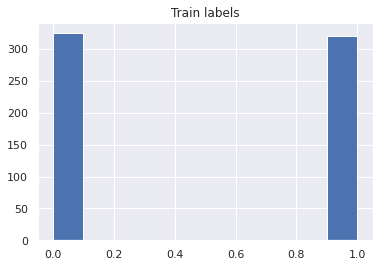

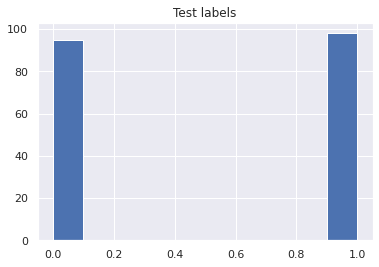

In [33]:
plt.hist(y_train)
plt.title("Train labels")
plt.show()

plt.hist(y_test)
plt.title("Test labels")
plt.show()

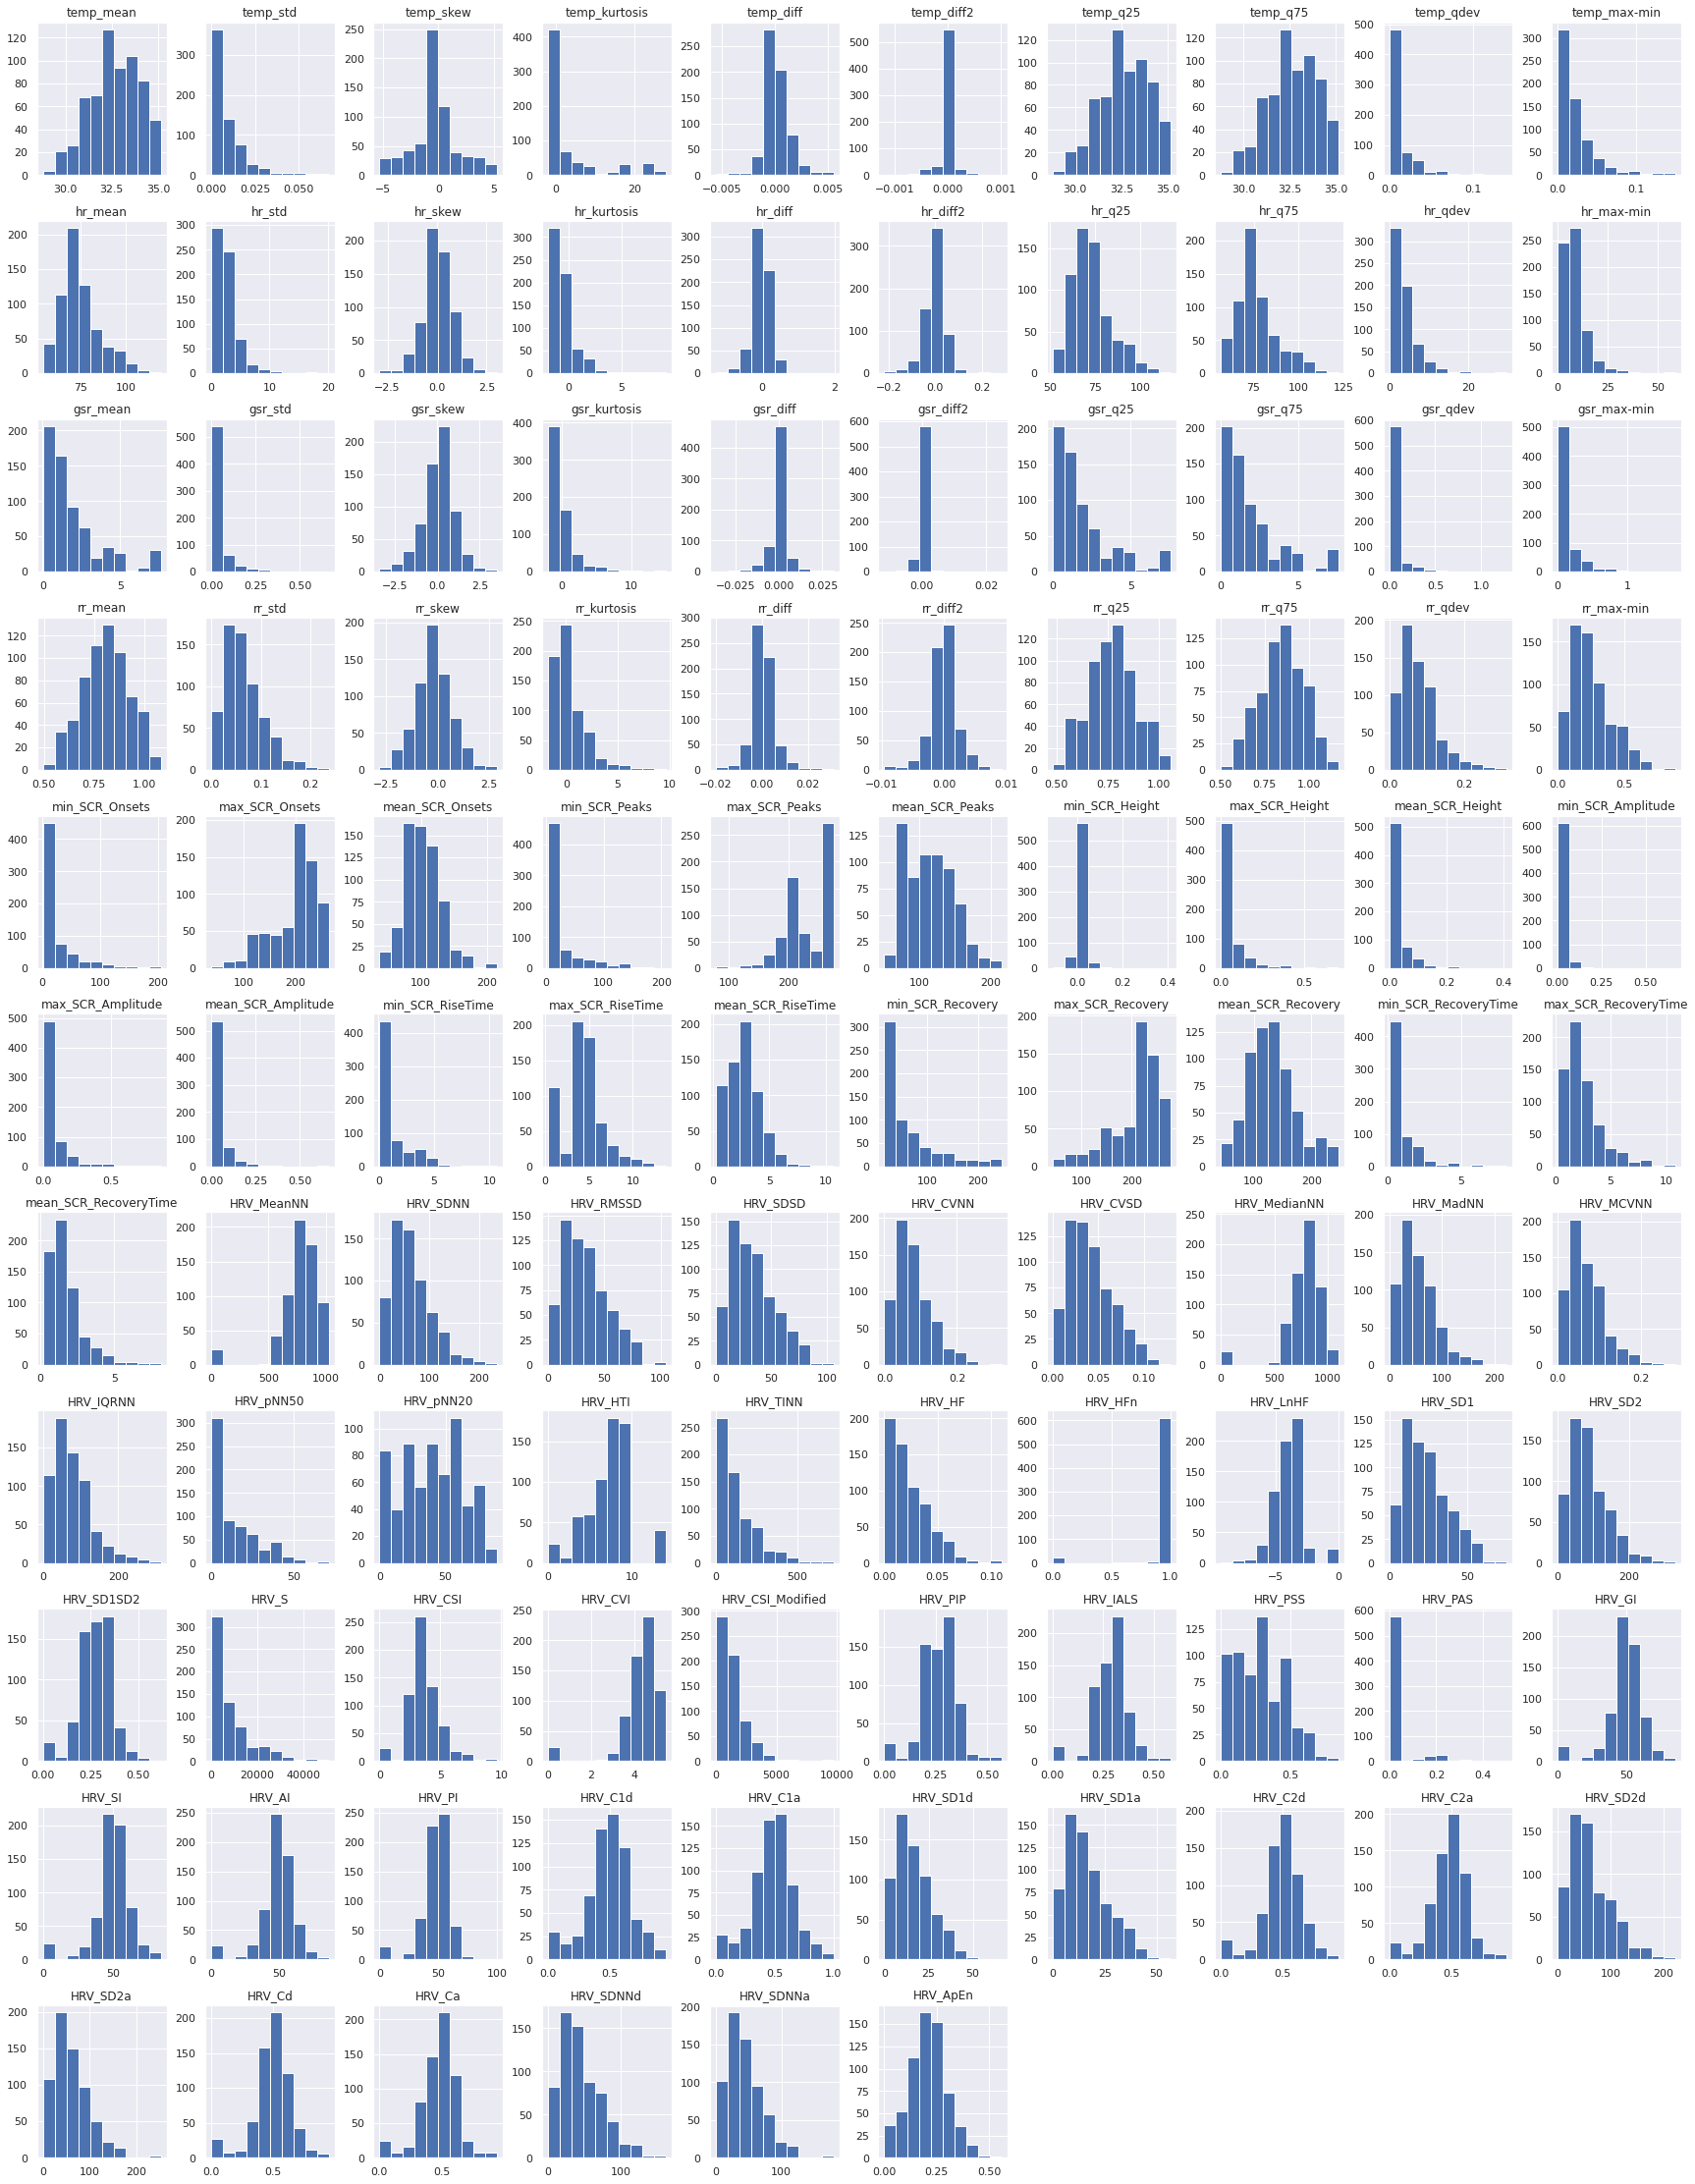

In [34]:
# plot distribution of training features
X_train.hist(figsize=(30, 40))
plt.show()

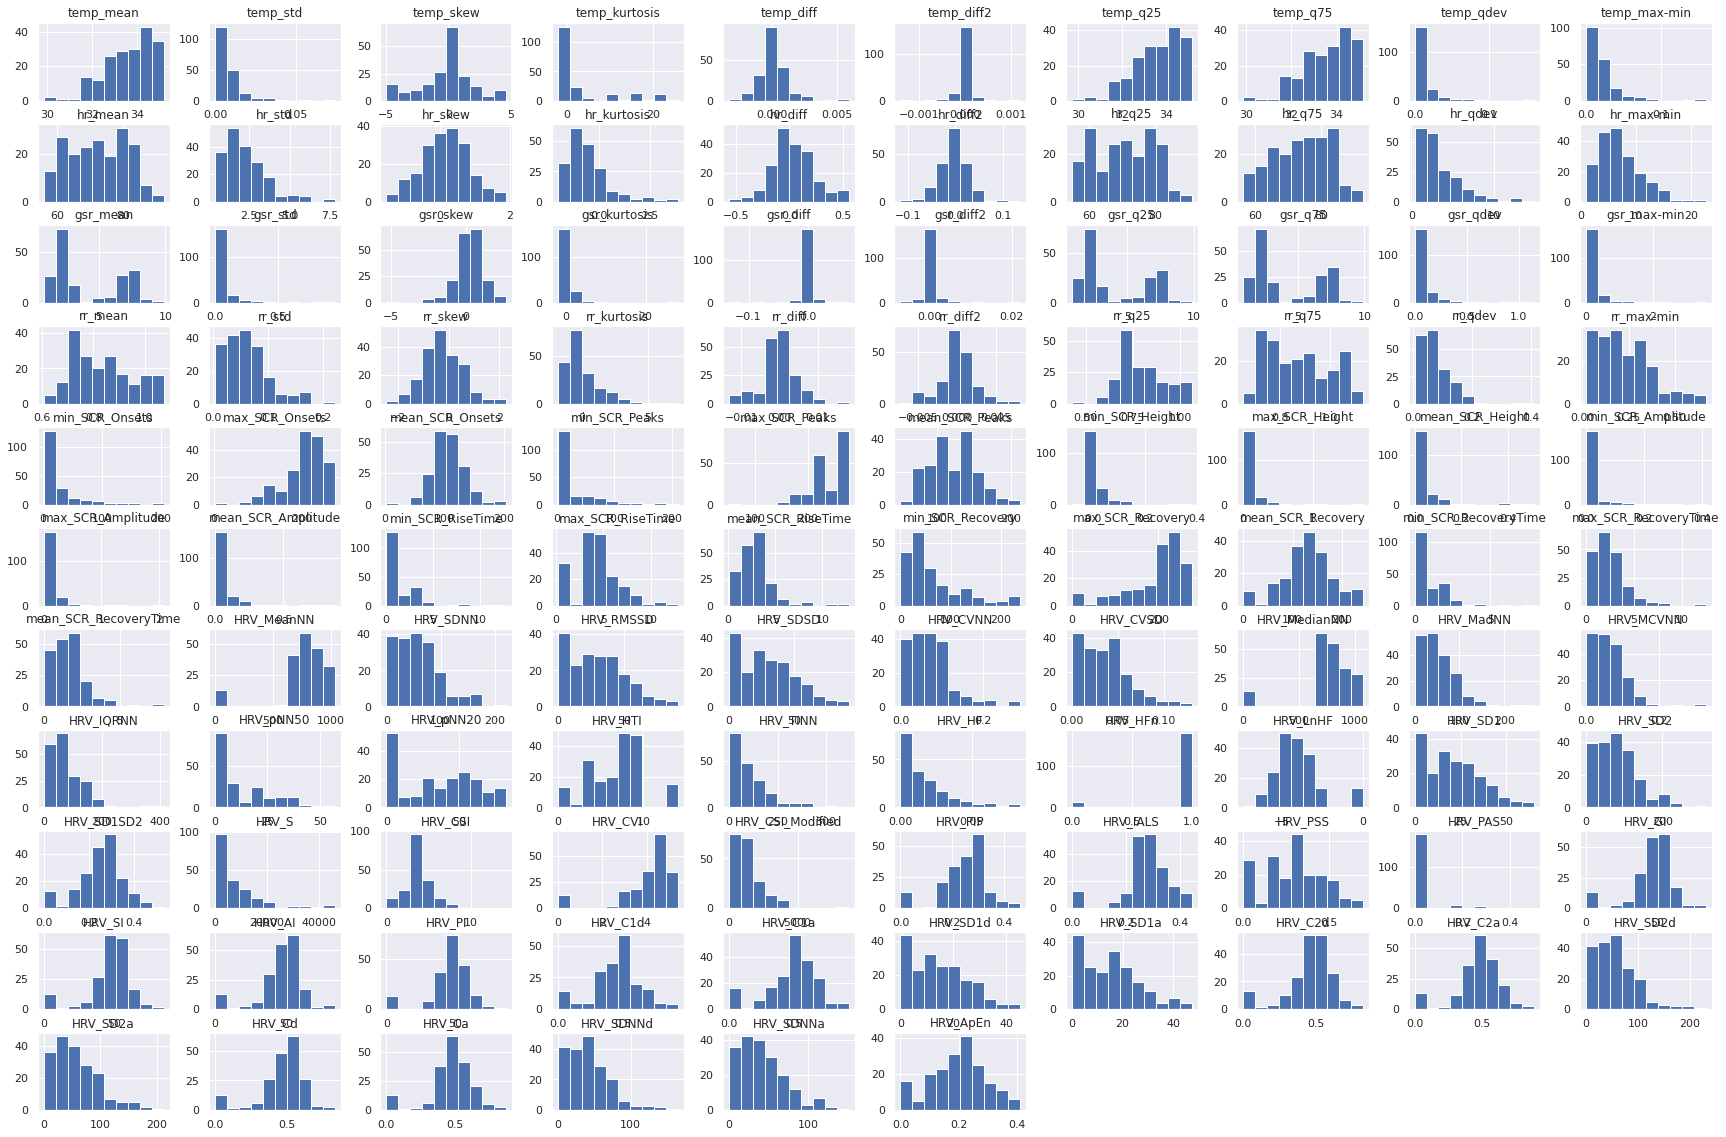

In [35]:
# plot distribution of test features
X_test.hist(figsize=(30, 20))
plt.show()

In [36]:
# Decision tree
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)  # train the classifier
pred = clf.predict(X_test)
print("Report for a Decision tree")
print(classification_report(y_test, pred))

print()
# Majority classifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)  # train the classifier
pred = dummy.predict(X_test)
print("Report for a Dummy classifier")
print(classification_report(y_test, pred))

Report for a Decision tree
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        95
           1       0.62      0.54      0.58        98

    accuracy                           0.60       193
   macro avg       0.60      0.60      0.59       193
weighted avg       0.60      0.60      0.59       193


Report for a Dummy classifier
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        95
           1       0.00      0.00      0.00        98

    accuracy                           0.49       193
   macro avg       0.25      0.50      0.33       193
weighted avg       0.24      0.49      0.32       193



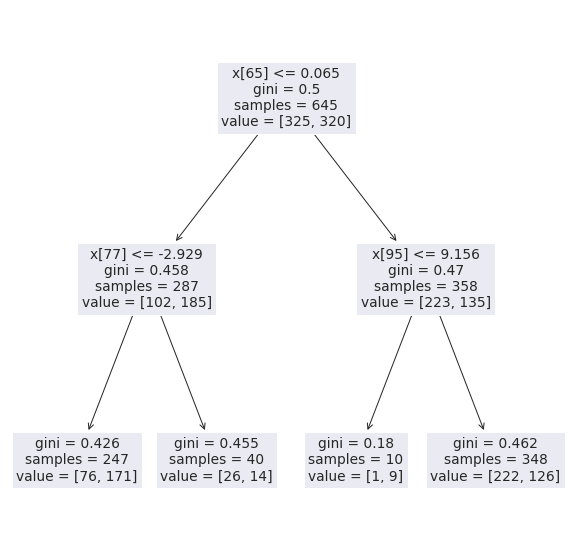

Index(['rr_qdev', 'HRV_SD2', 'gsr_max-min'], dtype='object')

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
p = plot_tree(clf)
plt.show()

selected_features = [38, 79, 29]  # indices of selected features in the trees
X_train.columns[selected_features]

In [38]:
import time

start = time.time()
gk = GroupKFold(n_splits=len(np.unique(train_ids)))
splits = gk.get_n_splits(
    X_train, y_train, train_ids
)  # generate folds to evaluate the models using leave-one-subject-out
estimator = XGBClassifier(n_jobs=-1)
fs_clf = RFECV(
    estimator=estimator,  # which estimator to use
    step=1,  # how many features to be removed at each iteration
    cv=splits,  # use pre-defined splits for evaluation (LOSO)
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=-1,
)

fs_clf.fit(
    X_train, y_train
)  # perform feature selection. Depending on the size of the data and the estimator, this may last for a while
end = time.time()
print(end - start)
selected_features = X_train.columns[fs_clf.ranking_ == 1]

pred = fs_clf.predict(X_test)
print("Report for XGBClassifier with feature selection")
print(classification_report(y_test, pred))

print("Selected features:", selected_features)

311.63847827911377
Report for XGBClassifier with feature selection
              precision    recall  f1-score   support

           0       0.65      0.55      0.59        95
           1       0.62      0.71      0.66        98

    accuracy                           0.63       193
   macro avg       0.63      0.63      0.63       193
weighted avg       0.63      0.63      0.63       193

Selected features: Index(['temp_mean', 'temp_std', 'temp_skew', 'temp_kurtosis', 'temp_diff',
       'temp_diff2', 'temp_q25', 'temp_qdev', 'temp_max-min', 'hr_mean',
       'hr_std', 'hr_skew', 'hr_kurtosis', 'hr_diff', 'hr_diff2', 'hr_q25',
       'hr_q75', 'hr_qdev', 'hr_max-min', 'gsr_mean', 'gsr_std', 'gsr_skew',
       'gsr_kurtosis', 'gsr_diff', 'gsr_diff2', 'gsr_q25', 'gsr_q75',
       'gsr_qdev', 'gsr_max-min', 'rr_mean', 'rr_std', 'rr_skew',
       'rr_kurtosis', 'rr_diff', 'rr_diff2', 'rr_q25', 'rr_q75', 'rr_qdev',
       'min_SCR_Onsets', 'max_SCR_Onsets', 'mean_SCR_Onsets', 'min_SCR_Pea